In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Oct  2 17:41:23 2019

@author: Audie
"""
# Check modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.linalg import qr
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
import os
import cv2

In [2]:
#%% Load Yale Database
Ni = []                     # Index of people in Yale Database                    
Nx = [14]                   # 14th person corrupted
for i in range(1,39+1):
    if i in Nx:
        continue
    else:
        Ni+=[i]
        
m = 192
n = 168

dirn = 'CroppedYale/'
cnt_tr = 0
cnt_te = 0
count = 0

avgFace = np.zeros((m*n,1))

Xtrain = []
Xtest = []

P1 = 38
P2 = 39
test = [P1,P2]
P_tr = []
P_te = []

fnames = []
for j in Ni:
    print('person: ',j)
    per = 'yaleB%02d'%j
    with open(dirn+per+'/'+per+'_P00.info') as fid: # read file with image name list
        fn = fid.read().splitlines()
    fn.pop(0)   # remove ambient filename

    if j in test:
        P_te += [cnt_te]
    else:
        P_tr += [cnt_tr]
    
    # scan all images for each person
    for i in fn:
        # check if file exists. Some images with file extension .bad are corrupted
        file = dirn+per+'/'+i    
        if os.path.exists(file):
            fnames += fn
            image = cv2.imread(file,0)
            R = np.reshape(image,(m*n,1))        # flatten
            if j in test:
                if cnt_te==0:
                    Xtest = R
                else:
                    Xtest = np.hstack((Xtest,R))
                cnt_te += 1
            else:
                if cnt_tr==0:
                    Xtrain = R
                else:
                    Xtrain = np.hstack((Xtrain,R))
                cnt_tr += 1
        else:
            continue        

person:  1
person:  2
person:  3
person:  4
person:  5
person:  6
person:  7
person:  8
person:  9
person:  10
person:  11
person:  12
person:  13
person:  15
person:  16
person:  17
person:  18
person:  19
person:  20
person:  21
person:  22
person:  23
person:  24
person:  25
person:  26
person:  27
person:  28
person:  29
person:  30
person:  31
person:  32
person:  33
person:  34
person:  35
person:  36
person:  37
person:  38
person:  39


Text(0.5, 1.0, 'Yale Database Average Face')

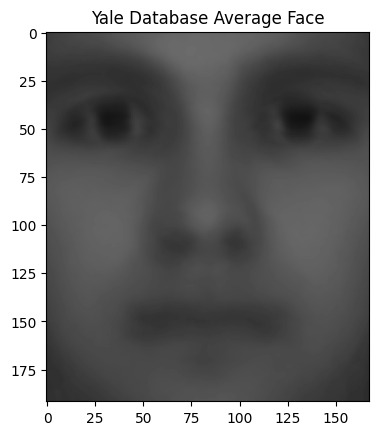

In [3]:
#%% Get Average Face
avgFace = np.sum(Xtrain,axis=1)/cnt_tr
avgFaceIm = np.reshape(avgFace,(m,n))
plt.figure()
plt.imshow(avgFaceIm,cmap='gray',vmin=0,vmax=255)
plt.title('Yale Database Average Face')

In [4]:
#%% Subtract the mean
Xtrain_s = np.zeros(Xtrain.shape)
for j in range(0,cnt_tr):
    Xtrain_s[:,j] = Xtrain[:,j] - avgFace
    if j%10==0:
        print(j)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800


In [5]:
#%% Compute the SVD
U,S,Vh = np.linalg.svd(Xtrain_s,full_matrices=False)

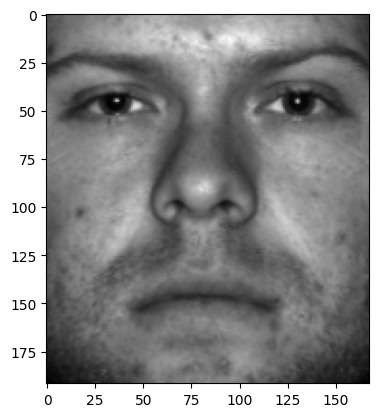

In [6]:
#%% Item 1 Spare Sensor Placement
# Item 1 a) Reconstucting in sample
# Code 6.1 
#--------------------------------------------------------------------------------------------------------
file = 'face.pgm'   # image filename here
Im = cv2.imread(file,0)
I = cv2.resize(Im,(n,m))
plt.figure()
plt.imshow(I,cmap='gray')
Ir = np.reshape(I,(m*n,1))      # image reshaped flattened
avgFace2 = np.atleast_2d(avgFace).T

In [7]:
#%% Code 6.2
rp = [20,100,500]      # input values for no. of modes and sensors

P = 20
P = 100
P = 500


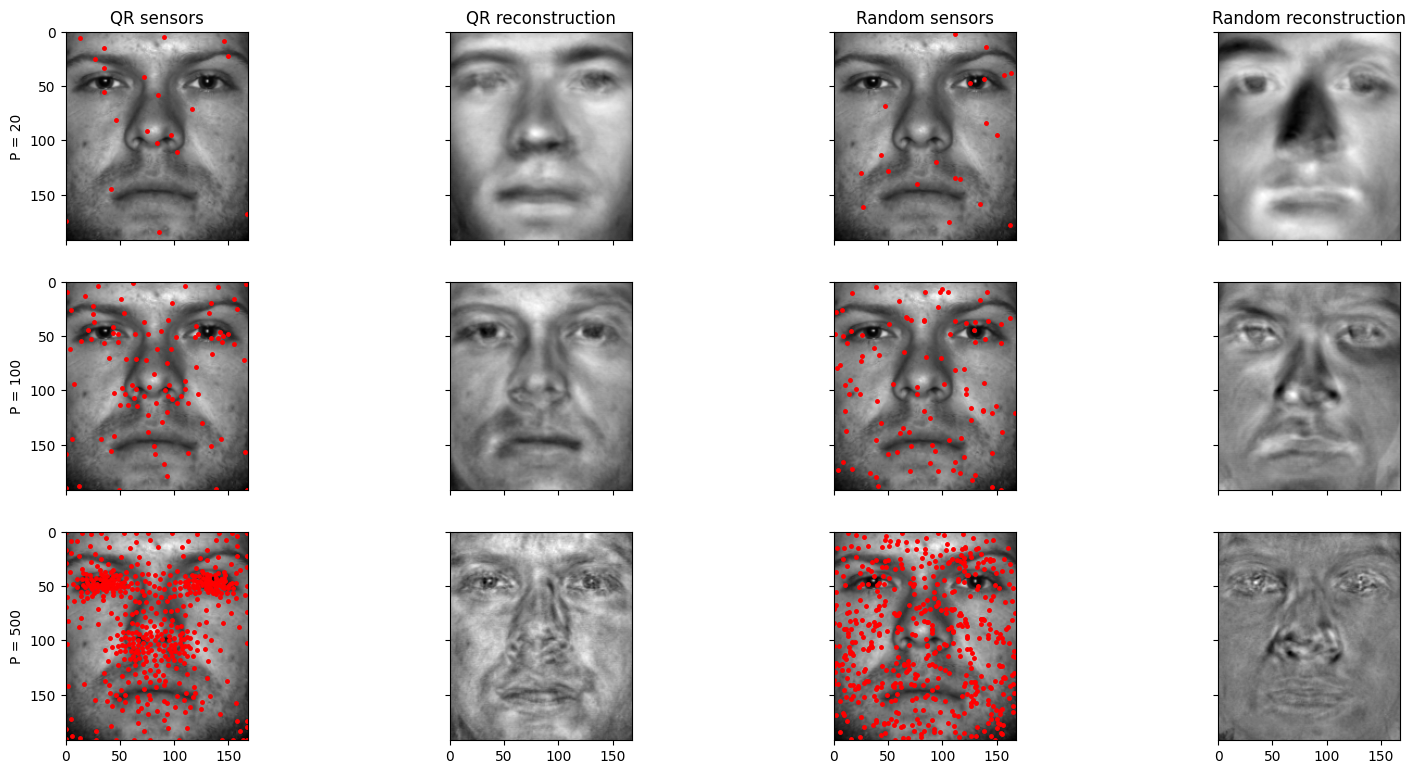

In [8]:
#%% Code 6.2
# rp = [50,100,500]      # input values for no. of modes and sensors

fig,ax = plt.subplots(len(rp),4,figsize=(19,9.2),sharex='all',sharey='all')
ax = np.atleast_2d(ax)

for k in range(0,len(rp)):
    print('P = '+str(rp[k]))
    r = rp[k]     # No. of modes
    p = rp[k]     # No. of sensors
    Psi = U[:,:r]
    
    Q,R,P = qr(Psi.T,pivoting=True)
    Pr = np.random.choice(np.arange(1,m*n,1),p)
    
    pC = np.zeros((p,2))    # qr sensor coordinates
    pCr = np.zeros((p,2))    # random sensor coordinates
    # Construct measurement matrix
    C = np.zeros((p,m*n)) 
    Cr = np.zeros((p,m*n))
    
    for j in range(p):
        C[j,P[j]] = 1
        Cr[j,Pr[j]] = 1
        
        xp = P[j]%n
        yp = np.ceil(P[j]/n)
        
        xpr = Pr[j]%n
        ypr = np.ceil(Pr[j]/n)
        
        pC[j,:] = np.array([xp,yp])
        pCr[j,:] = np.array([xpr,ypr])
    
    Ic = Ir
    #-------------------------------------------------------------------------
    # Item 1 c) insert code here
    #
    # Irs = Ir - avgFace2           # use this expression
    # Ic = ...
    #
    #-------------------------------------------------------------------------
    # QR Sensors    
    Theta = np.dot(C,Psi)
    y = np.take(Ic,P[:p])
    # get sparse vector s and reconstruct
    s,res,rank,sig = np.linalg.lstsq(Theta,y,rcond=None)
    recon = np.dot(Psi,s)
    ax[k,0].imshow(I,cmap='gray')
    ax[k,0].plot(pC[:,0],pC[:,1],'ro',markersize=2.5)
    ax[k,0].set_xlim([0,n])
    ax[k,0].set_ylim([m,0])
    ax[k,1].imshow(recon.reshape((m,n)),cmap='gray')
    
    # Random Sensors
    Theta = np.dot(Cr,Psi)
    y = np.take(Ic,Pr[:p])
    # get sparse vector s and reconstruct
    s,res,rank,sig = np.linalg.lstsq(Theta,y,rcond=None)
    recon = np.dot(Psi,s)
    ax[k,2].imshow(I,cmap='gray')
    ax[k,2].plot(pCr[:,0],pCr[:,1],'ro',markersize=2.5)
    ax[k,2].set_xlim([0,n])
    ax[k,2].set_ylim([m,0])
    ax[k,3].imshow(recon.reshape((m,n)),cmap='gray')
    
    ax[k,0].set_ylabel('P = '+str(rp[k]))
    if k == 0:
        ax[k,0].set_title('QR sensors')
        ax[k,1].set_title('QR reconstruction')
        ax[k,2].set_title('Random sensors')
        ax[k,3].set_title('Random reconstruction')

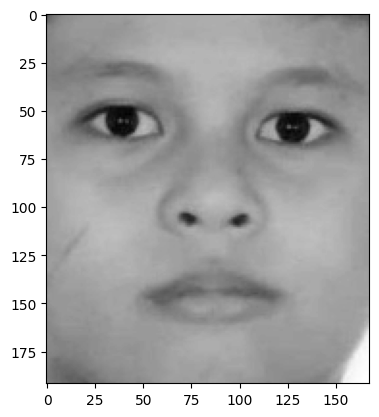

In [9]:
#%% Item 1 Spare Sensor Placement
# Item 1 b) Reconstucting in sample
# Code 6.1 
#--------------------------------------------------------------------------------------------------------
file = 'cahlil3.jpg'   # image filename here
Im = cv2.imread(file,0)
I = cv2.resize(Im,(n,m))
plt.figure()
plt.imshow(I,cmap='gray')
Ir = np.reshape(I,(m*n,1))      # image reshaped flattened
avgFace2 = np.atleast_2d(avgFace).T

P = 20
P = 100
P = 500


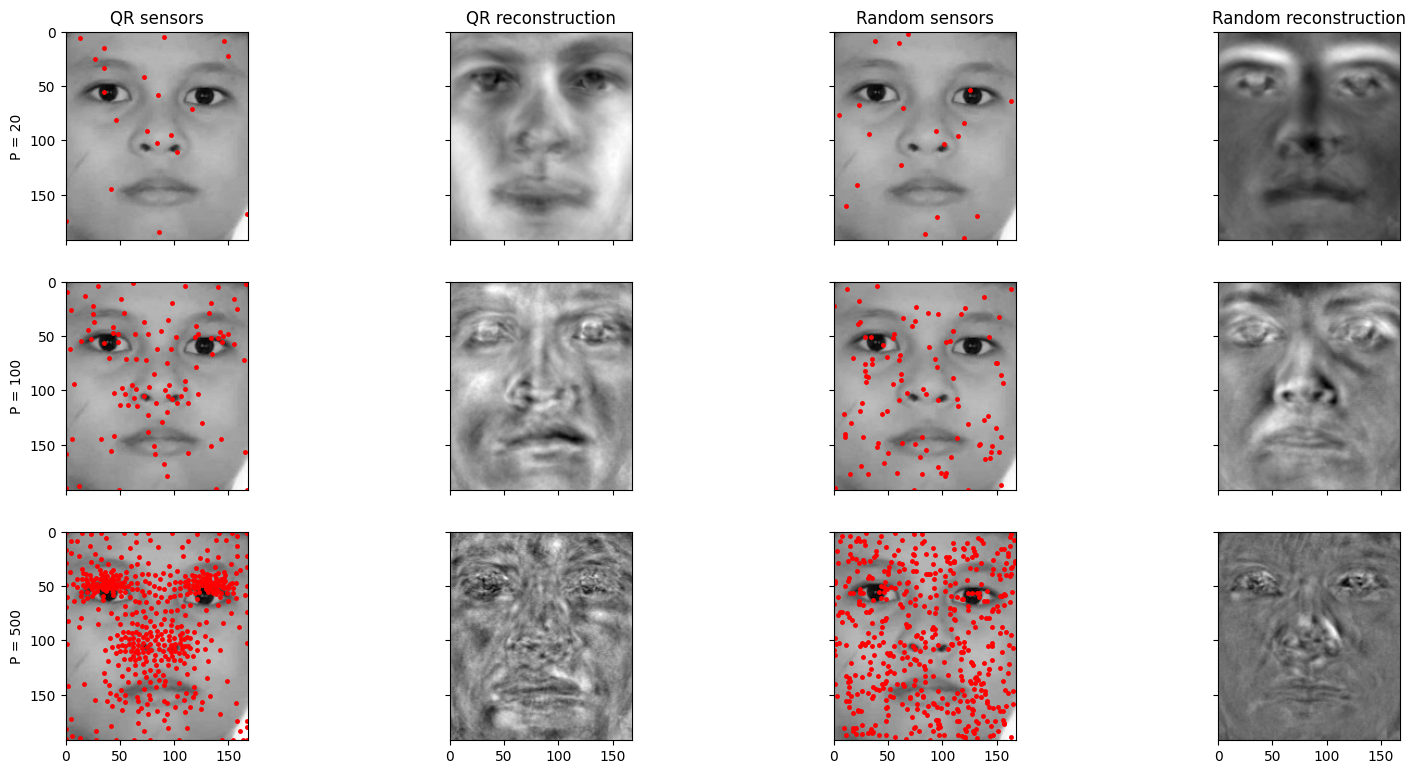

In [10]:
#%% Code 6.2
# rp = [50,100,500]      # input values for no. of modes and sensors

fig,ax = plt.subplots(len(rp),4,figsize=(19,9.2),sharex='all',sharey='all')
ax = np.atleast_2d(ax)

for k in range(0,len(rp)):
    print('P = '+str(rp[k]))
    r = rp[k]     # No. of modes
    p = rp[k]     # No. of sensors
    Psi = U[:,:r]
    
    Q,R,P = qr(Psi.T,pivoting=True)
    Pr = np.random.choice(np.arange(1,m*n,1),p)
    
    pC = np.zeros((p,2))    # qr sensor coordinates
    pCr = np.zeros((p,2))    # random sensor coordinates
    # Construct measurement matrix
    C = np.zeros((p,m*n)) 
    Cr = np.zeros((p,m*n))
    
    for j in range(p):
        C[j,P[j]] = 1
        Cr[j,Pr[j]] = 1
        
        xp = P[j]%n
        yp = np.ceil(P[j]/n)
        
        xpr = Pr[j]%n
        ypr = np.ceil(Pr[j]/n)
        
        pC[j,:] = np.array([xp,yp])
        pCr[j,:] = np.array([xpr,ypr])
    
    Ic = Ir
    #-------------------------------------------------------------------------
    # Item 1 c) insert code here
    #
    # Irs = Ir - avgFace2           # use this expression
    # Ic = ...
    #
    #-------------------------------------------------------------------------
    # QR Sensors    
    Theta = np.dot(C,Psi)
    y = np.take(Ic,P[:p])
    # get sparse vector s and reconstruct
    s,res,rank,sig = np.linalg.lstsq(Theta,y,rcond=None)
    recon = np.dot(Psi,s)
    ax[k,0].imshow(I,cmap='gray')
    ax[k,0].plot(pC[:,0],pC[:,1],'ro',markersize=2.5)
    ax[k,0].set_xlim([0,n])
    ax[k,0].set_ylim([m,0])
    ax[k,1].imshow(recon.reshape((m,n)),cmap='gray')
    
    # Random Sensors
    Theta = np.dot(Cr,Psi)
    y = np.take(Ic,Pr[:p])
    # get sparse vector s and reconstruct
    s,res,rank,sig = np.linalg.lstsq(Theta,y,rcond=None)
    recon = np.dot(Psi,s)
    ax[k,2].imshow(I,cmap='gray')
    ax[k,2].plot(pCr[:,0],pCr[:,1],'ro',markersize=2.5)
    ax[k,2].set_xlim([0,n])
    ax[k,2].set_ylim([m,0])
    ax[k,3].imshow(recon.reshape((m,n)),cmap='gray')
    
    ax[k,0].set_ylabel('P = '+str(rp[k]))
    if k == 0:
        ax[k,0].set_title('QR sensors')
        ax[k,1].set_title('QR reconstruction')
        ax[k,2].set_title('Random sensors')
        ax[k,3].set_title('Random reconstruction')

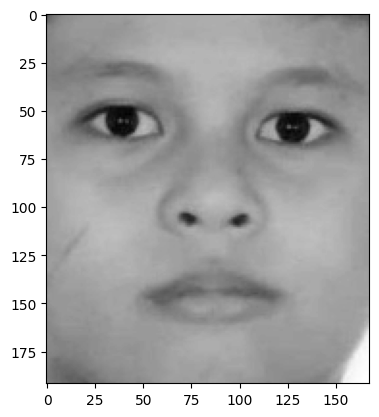

In [11]:
#%% Item 1 Spare Sensor Placement
# Item 1 c) Reconstucting in sample
# Code 6.1 
#--------------------------------------------------------------------------------------------------------
file = 'cahlil3.jpg'   # image filename here
Im = cv2.imread(file,0)
I = cv2.resize(Im,(n,m))
plt.figure()
plt.imshow(I,cmap='gray')
Ir = np.reshape(I,(m*n,1))      # image reshaped flattened
avgFace2 = np.atleast_2d(avgFace).T

P = 20
P = 100
P = 500


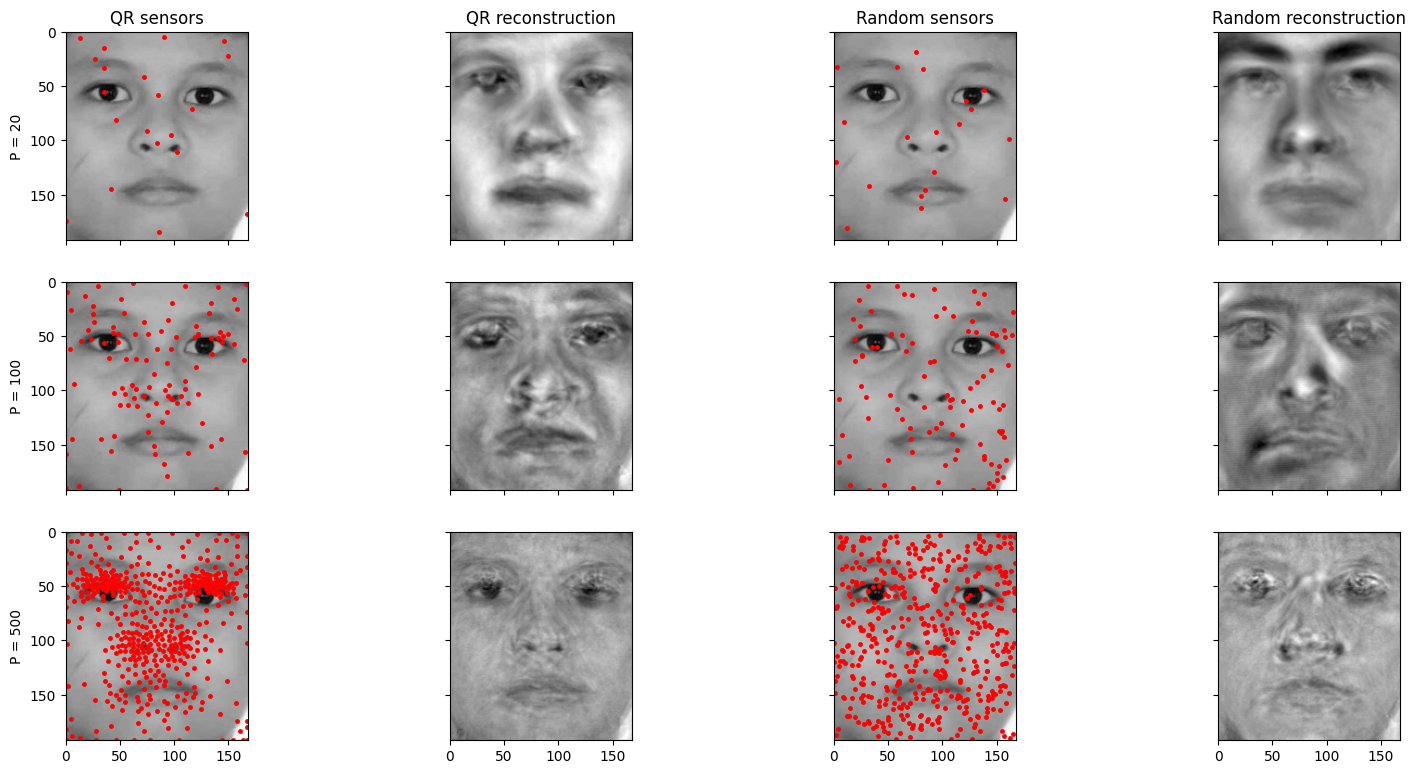

In [12]:
#%% Code 6.2
# rp = [50,100,500]      # input values for no. of modes and sensors

fig,ax = plt.subplots(len(rp),4,figsize=(19,9.2),sharex='all',sharey='all')
ax = np.atleast_2d(ax)

for k in range(0,len(rp)):
    print('P = '+str(rp[k]))
    r = rp[k]     # No. of modes
    p = rp[k]     # No. of sensors
    Psi = U[:,:r]
    
    Q,R,P = qr(Psi.T,pivoting=True)
    Pr = np.random.choice(np.arange(1,m*n,1),p)
    
    pC = np.zeros((p,2))    # qr sensor coordinates
    pCr = np.zeros((p,2))    # random sensor coordinates
    # Construct measurement matrix
    C = np.zeros((p,m*n)) 
    Cr = np.zeros((p,m*n))
    
    for j in range(p):
        C[j,P[j]] = 1
        Cr[j,Pr[j]] = 1
        
        xp = P[j]%n
        yp = np.ceil(P[j]/n)
        
        xpr = Pr[j]%n
        ypr = np.ceil(Pr[j]/n)
        
        pC[j,:] = np.array([xp,yp])
        pCr[j,:] = np.array([xpr,ypr])
    
    Ic = Ir
    #-------------------------------------------------------------------------
    # Item 1 c) insert code here
    
    Irs = Ir - avgFace2           # use this expression
    Ic = avgFace2 + np.dot(Psi,np.dot(Psi.T,Irs))
    
    #-------------------------------------------------------------------------
    # QR Sensors    
    Theta = np.dot(C,Psi)
    y = np.take(Ic,P[:p])
    # get sparse vector s and reconstruct
    s,res,rank,sig = np.linalg.lstsq(Theta,y,rcond=None)
    recon = np.dot(Psi,s)
    ax[k,0].imshow(I,cmap='gray')
    ax[k,0].plot(pC[:,0],pC[:,1],'ro',markersize=2.5)
    ax[k,0].set_xlim([0,n])
    ax[k,0].set_ylim([m,0])
    ax[k,1].imshow(recon.reshape((m,n)),cmap='gray')
    
    # Random Sensors
    Theta = np.dot(Cr,Psi)
    y = np.take(Ic,Pr[:p])
    # get sparse vector s and reconstruct
    s,res,rank,sig = np.linalg.lstsq(Theta,y,rcond=None)
    recon = np.dot(Psi,s)
    ax[k,2].imshow(I,cmap='gray')
    ax[k,2].plot(pCr[:,0],pCr[:,1],'ro',markersize=2.5)
    ax[k,2].set_xlim([0,n])
    ax[k,2].set_ylim([m,0])
    ax[k,3].imshow(recon.reshape((m,n)),cmap='gray')
    
    ax[k,0].set_ylabel('P = '+str(rp[k]))
    if k == 0:
        ax[k,0].set_title('QR sensors')
        ax[k,1].set_title('QR reconstruction')
        ax[k,2].set_title('Random sensors')
        ax[k,3].set_title('Random reconstruction')

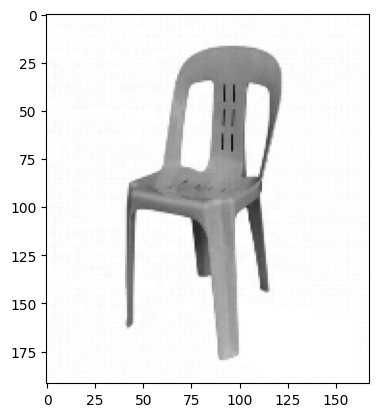

In [13]:
#%% Item 1 Spare Sensor Placement
# Item 1 c) Reconstucting in sample
# Code 6.1 
#--------------------------------------------------------------------------------------------------------
file = 'chair.jpg'   # image filename here
Im = cv2.imread(file,0)
I = cv2.resize(Im,(n,m))
plt.figure()
plt.imshow(I,cmap='gray')
Ir = np.reshape(I,(m*n,1))      # image reshaped flattened
avgFace2 = np.atleast_2d(avgFace).T

P = 20
P = 100
P = 500


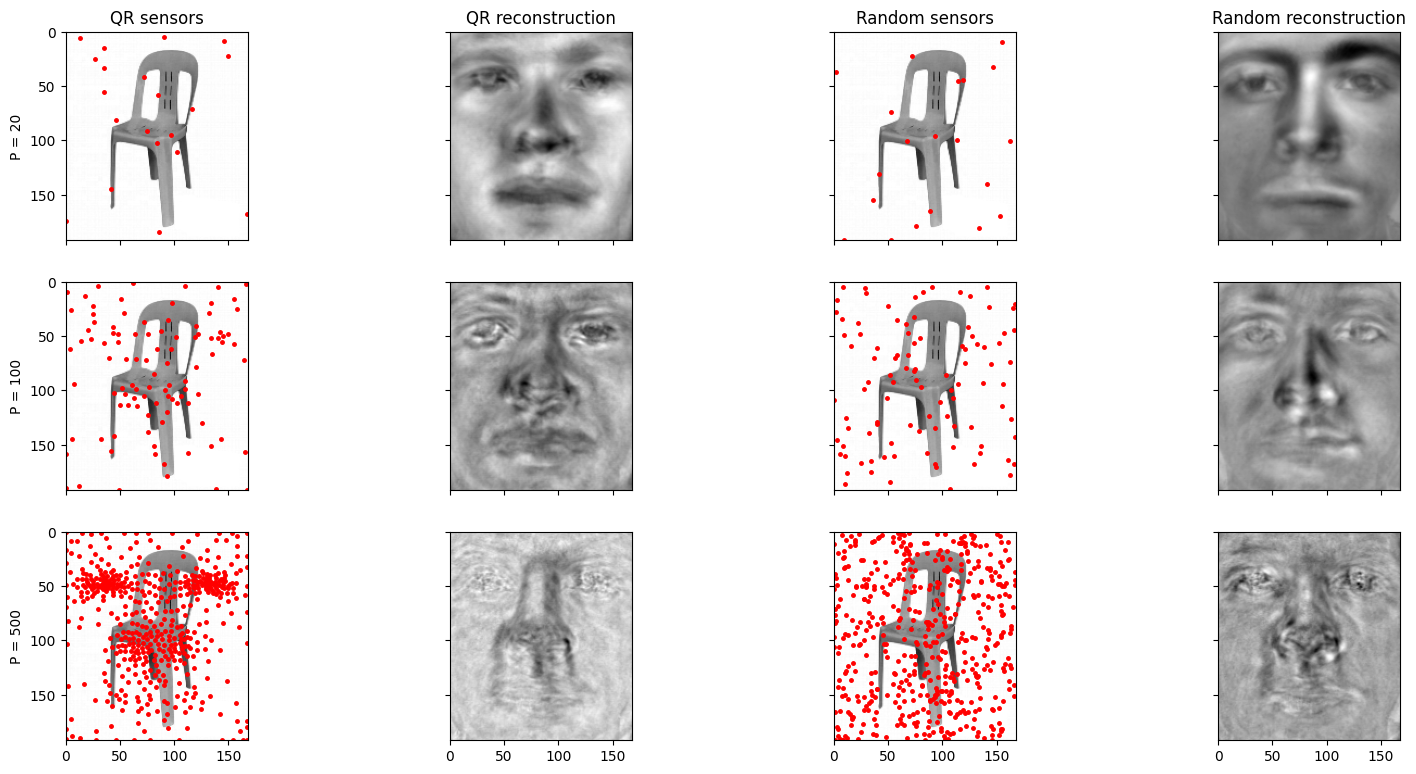

In [15]:
#%% Code 6.2
# rp = [50,100,500]      # input values for no. of modes and sensors

fig,ax = plt.subplots(len(rp),4,figsize=(19,9.2),sharex='all',sharey='all')
ax = np.atleast_2d(ax)

for k in range(0,len(rp)):
    print('P = '+str(rp[k]))
    r = rp[k]     # No. of modes
    p = rp[k]     # No. of sensors
    Psi = U[:,:r]
    
    Q,R,P = qr(Psi.T,pivoting=True)
    Pr = np.random.choice(np.arange(1,m*n,1),p)
    
    pC = np.zeros((p,2))    # qr sensor coordinates
    pCr = np.zeros((p,2))    # random sensor coordinates
    # Construct measurement matrix
    C = np.zeros((p,m*n)) 
    Cr = np.zeros((p,m*n))
    
    for j in range(p):
        C[j,P[j]] = 1
        Cr[j,Pr[j]] = 1
        
        xp = P[j]%n
        yp = np.ceil(P[j]/n)
        
        xpr = Pr[j]%n
        ypr = np.ceil(Pr[j]/n)
        
        pC[j,:] = np.array([xp,yp])
        pCr[j,:] = np.array([xpr,ypr])
    
    Ic = Ir
    #-------------------------------------------------------------------------
    # Item 1 c) insert code here
    
    Irs = Ir - avgFace2           # use this expression
    Ic = avgFace2 + np.dot(Psi,np.dot(Psi.T,Irs))
    
    #-------------------------------------------------------------------------
    # QR Sensors    
    Theta = np.dot(C,Psi)
    y = np.take(Ic,P[:p])
    # get sparse vector s and reconstruct
    s,res,rank,sig = np.linalg.lstsq(Theta,y,rcond=None)
    recon = np.dot(Psi,s)
    ax[k,0].imshow(I,cmap='gray')
    ax[k,0].plot(pC[:,0],pC[:,1],'ro',markersize=2.5)
    ax[k,0].set_xlim([0,n])
    ax[k,0].set_ylim([m,0])
    ax[k,1].imshow(recon.reshape((m,n)),cmap='gray')
    
    # Random Sensors
    Theta = np.dot(Cr,Psi)
    y = np.take(Ic,Pr[:p])
    # get sparse vector s and reconstruct
    s,res,rank,sig = np.linalg.lstsq(Theta,y,rcond=None)
    recon = np.dot(Psi,s)
    ax[k,2].imshow(I,cmap='gray')
    ax[k,2].plot(pCr[:,0],pCr[:,1],'ro',markersize=2.5)
    ax[k,2].set_xlim([0,n])
    ax[k,2].set_ylim([m,0])
    ax[k,3].imshow(recon.reshape((m,n)),cmap='gray')
    
    ax[k,0].set_ylabel('P = '+str(rp[k]))
    if k == 0:
        ax[k,0].set_title('QR sensors')
        ax[k,1].set_title('QR reconstruction')
        ax[k,2].set_title('Random sensors')
        ax[k,3].set_title('Random reconstruction')